In [117]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris

## Read data

In [3]:
iris=load_iris()

iris

In [5]:
diris=pd.DataFrame(data=iris['data'],columns=['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [6]:
diris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
dtarget=pd.DataFrame(data=iris['target'],columns=['species'])
dtarget=dtarget.apply(lambda x: iris['target_names'][x])


In [35]:
diris['target']=dtarget
diris['species']=dtarget
diris=diris.drop(columns='target',axis=1)

## Explore data

In [36]:
diris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [37]:
diris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
species              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [38]:
diris.shape

(150, 5)

In [39]:
diris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [40]:
diris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [41]:
diris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.109369,0.871754,0.817954
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544
petal length (cm),0.871754,-0.420516,1.000000,0.962757
petal width (cm),0.817954,-0.356544,0.962757,1.000000


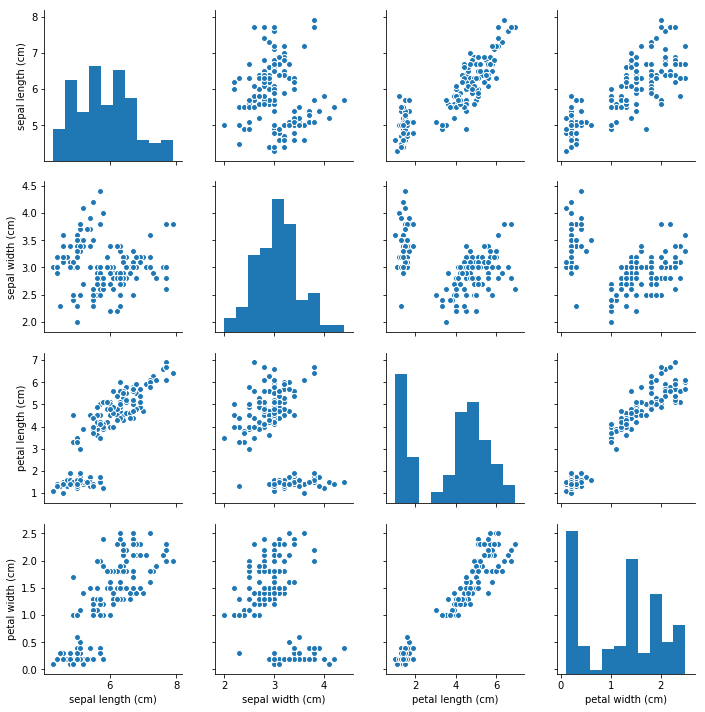

In [42]:
sns.pairplot(diris)
plt.show()

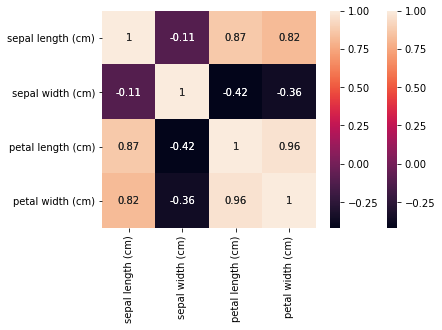

In [45]:
sns.heatmap(diris.corr(),annot=True)
plt.show()

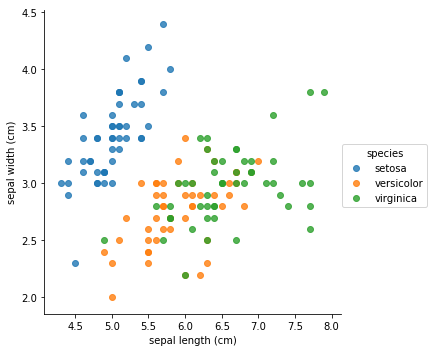

In [56]:
sns.lmplot(x='sepal length (cm)',y='sepal width (cm)', fit_reg=False,data=diris, hue='species');
plt.show()

In [58]:
from mlxtend.plotting import category_scatter

fix = category_scatter(x='sepal length (cm)',y='sepal width (cm)', label_col=4, 
                       data=diris, legend_loc='upper left')

ImportError: No module named 'mlxtend'

In [69]:
# Plot
diris=diris.rename(columns={'sepal length (cm)':'sepal_length','sepal width (cm)':'sepal_width'})
diris.head()


,sepal_length,sepal_width,petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


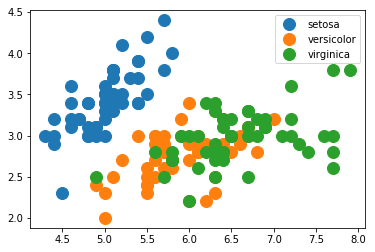

In [71]:
groups=diris.groupby(['species'])
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for species, group in groups:
    ax.plot(group.sepal_length, group.sepal_width, marker='o', linestyle='', ms=12, label=species);
ax.legend()
plt.show()

In [73]:
print(diris.groupby(['species']).corr())

                              petal length (cm)  petal width (cm)  \
species                                                             
setosa     petal length (cm)           1.000000          0.306308   
           petal width (cm)            0.306308          1.000000   
           sepal_length                0.263874          0.279092   
           sepal_width                 0.176695          0.279973   
versicolor petal length (cm)           1.000000          0.786668   
           petal width (cm)            0.786668          1.000000   
           sepal_length                0.754049          0.546461   
           sepal_width                 0.560522          0.663999   
virginica  petal length (cm)           1.000000          0.322108   
           petal width (cm)            0.322108          1.000000   
           sepal_length                0.864225          0.281108   
           sepal_width                 0.401045          0.537728   

                              sep

In [74]:
from sklearn.model_selection import train_test_split

## Train the model

In [92]:
diris.head()

,sepal_length,sepal_width,petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [102]:
y=diris.species
x_train,x_test,y_train,y_test=train_test_split(diris[['sepal_length',
  'sepal_width',
  'petal length (cm)',
  'petal width (cm)']],y,random_state=123,test_size=.3)


In [104]:
y_train.head()

114     virginica
136     virginica
53     versicolor
19         setosa
38         setosa
Name: species, dtype: object

In [105]:
model=LogisticRegression().fit(x_train,y_train)

## Compute the error

In [106]:
y_pred=model.predict(x_test)

In [107]:
accuracy=accuracy_score(y_test,y_pred)

In [108]:
print('accuracy',accuracy)

accuracy 0.9777777777777777


In [112]:
cm=confusion_matrix(y_test,y_pred)

In [113]:
print(cm)

[[18  0  0]
 [ 0 10  0]
 [ 0  1 16]]


In [114]:
accuracy2=model.score(x_test,y_test)

In [115]:
print(accuracy2)

0.9777777777777777


In [118]:
print(classification_report(y_pred,y_test))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        18
 versicolor       1.00      0.91      0.95        11
  virginica       0.94      1.00      0.97        16

avg / total       0.98      0.98      0.98        45



## f1 id 2*precision*recall/(precision+recall)

## now we  use grid search to find good parameters

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
params={'C':[.01,.05,.1,.5,1,5,10],'penalty':['l1','l2']}

In [121]:
estimator=LogisticRegression()

In [122]:
optimizer=GridSearchCV(estimator, params, cv=10)#cv is for cross validation

In [124]:
optimizer.fit(x_test,y_test)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [125]:
y_pred2=optimizer.best_estimator_.predict(x_test)

In [126]:
accuracy3=accuracy_score(y_pred2,y_test)
print(accuracy3)

0.9777777777777777


In [128]:
print('best result %f using %s' % (optimizer.best_score_, optimizer.best_params_))

best result 0.933333 using {'C': 10, 'penalty': 'l1'}


In [130]:
means=optimizer.cv_results_['mean_test_score']
stdvs=optimizer.cv_results_['std_test_score']
params=optimizer.cv_results_['params']

In [132]:
for mean, stdv, param in zip(means, stdv, params): 
    print('%f (%f) with %s' % (mean, stdv, param))

0.400000 (0.038490) with {'C': 0.01, 'penalty': 'l1'}
0.777778 (0.045812) with {'C': 0.01, 'penalty': 'l2'}
0.377778 (0.045812) with {'C': 0.05, 'penalty': 'l1'}
0.777778 (0.045812) with {'C': 0.05, 'penalty': 'l2'}
0.777778 (0.045812) with {'C': 0.1, 'penalty': 'l1'}
0.777778 (0.045812) with {'C': 0.1, 'penalty': 'l2'}
0.800000 (0.083887) with {'C': 0.5, 'penalty': 'l1'}
0.800000 (0.083887) with {'C': 0.5, 'penalty': 'l2'}
0.866667 (0.108866) with {'C': 1, 'penalty': 'l1'}
0.866667 (0.108866) with {'C': 1, 'penalty': 'l2'}
0.911111 (0.099381) with {'C': 5, 'penalty': 'l1'}
0.911111 (0.099381) with {'C': 5, 'penalty': 'l2'}
0.933333 (0.094281) with {'C': 10, 'penalty': 'l1'}
0.911111 (0.099381) with {'C': 10, 'penalty': 'l2'}
